# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [50]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1],X_train.shape[2]]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

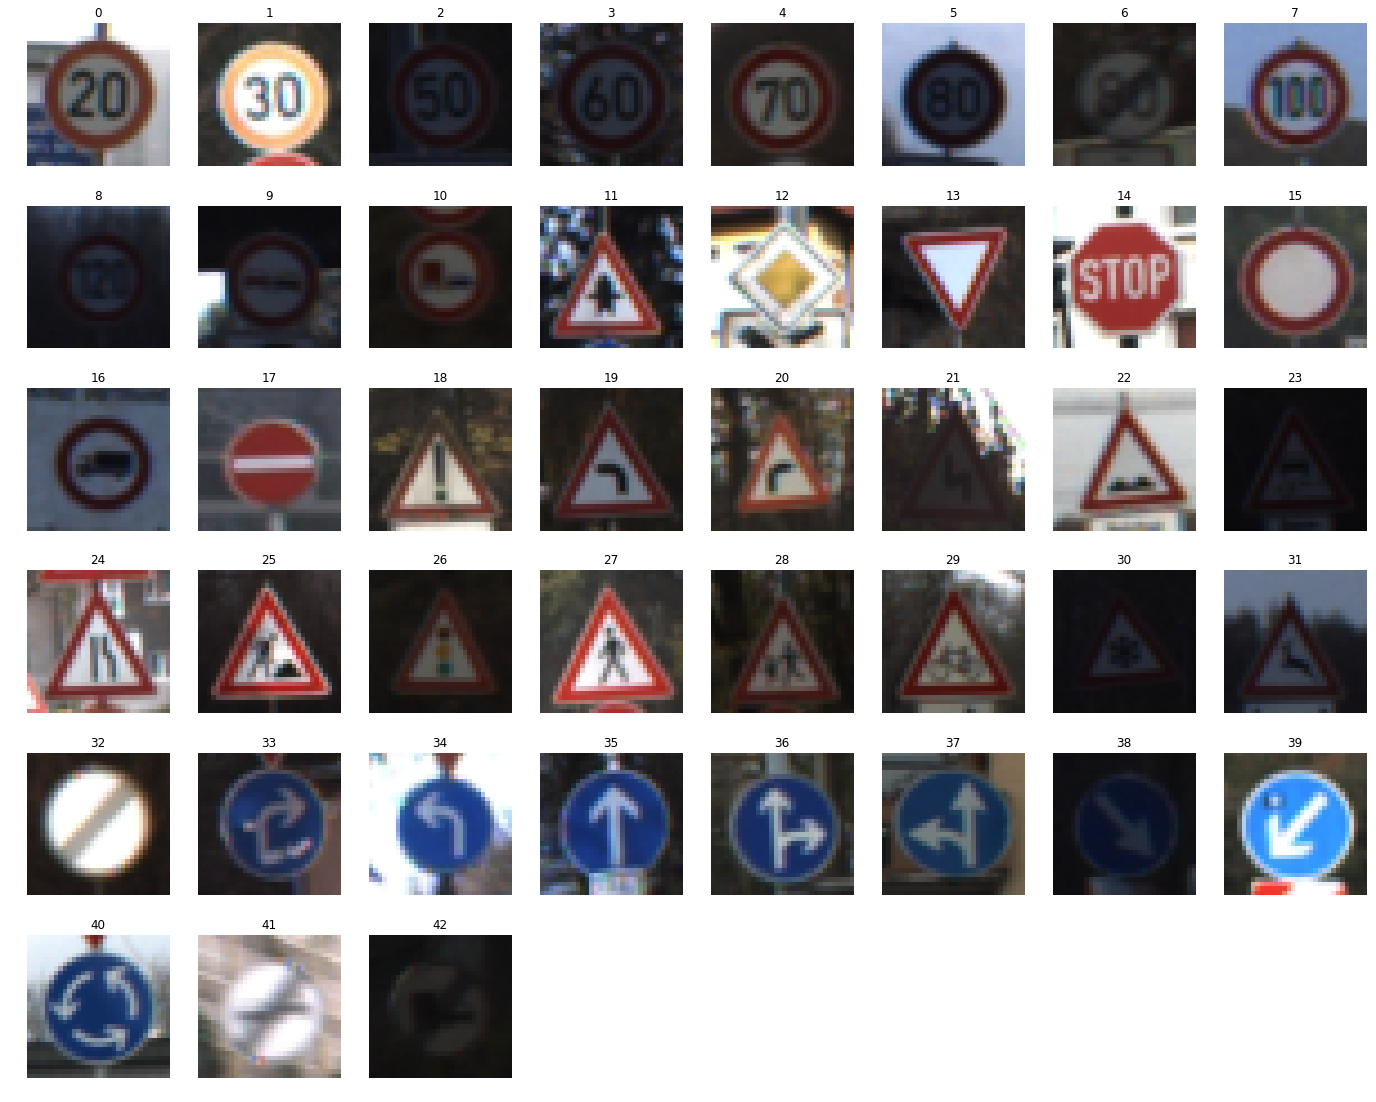

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import cv2

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline


num_images=[]                         #  Iinitialize
plt.figure(figsize=(24, 33))  
for i in range(0, n_classes):
    plt.subplot(10, 8, i+1)
    X_filter = X_train[y_train == i]  # Filter for each sign label
    plt.imshow(X_filter[50, :, :, :]) # Plot the image number 51 of each class
    plt.title(i)                      # Set the class number as title
    plt.axis('off')
    num_images.append(len(X_filter)) # Append the quantity of each sign class images
plt.show()



As we can see above, the train data set has a great variety of lighting and blur conditions. Therefore, during the preprocessing the images will be enhanced applying blur and contrast corrections. 

Here below the images corresponding to each label in the dataset counted in the variable *num_images* are ploted obtaining the distribution of images between labels in the training dataset, wich certainly has a great variation.

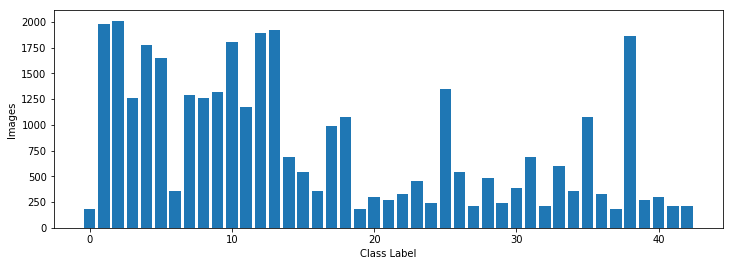

In [4]:
#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_images)
plt.xlabel("Class Label")
plt.ylabel("Images")
plt.show()



As the above plot shows, there is a great variation between labels in what to image quantity reffers. The biggest image quantity belong to the labels 2 and 1 corresponding to the 50 and 30 km/h speed limits with more than 2000 images. On the other hand, the images belonging to labels 0 and 19 do not reach 250 corresponding to 20km/h speed limit and left turn signals.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

<function matplotlib.pyplot.show>

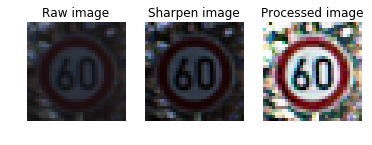

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

# Sharpen the image
def sharpen(img):
    gauss = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gauss, -1, 0)

#Change image contrast
def contr(img, s=1.0):
    m = 130*(1.0-s)
    imgC = cv2.multiply(img, np.array([s]))
    return cv2.add(imgC, np.array([m]))

 #Histogram Equalization in order to enhance contrast
def Hist(img):
    imgH = img.copy() 
    imgH[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    imgH[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    imgH[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return imgH

#transformation pipeline
def process(img):
    imgP = sharpen(img)           # Adjust blur
    imgP = contr(imgP, 0.15)      # Adjust contrast # Tuned hyperparameter trhough try-error
    return Hist(imgP)             # Apply histogram equalization

X_filter = X_train[y_train == 3]  #Select the third class
img=X_filter[50,:, :, :]          #Select the 51th image o the class

plt.figure(figsize=(6, 3))
plt.subplot(1, 3, 1)
plt.imshow(img)                   #Plot the raw training image
plt.title("Raw image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(sharpen(img))          #Plot the sharpen training image
plt.title("Sharpen image")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(process(img))          #Plot the processed training image
plt.title("Processed image")
plt.axis('off')
plt.show
    
    

As clearly stands out the processed image is much more bright and defined preserving and enhancing the colour, which in my opinion has to be preserved not applying grayscale filter, as colour can be one good start point in order to distinguish signals. 

Here below the processing of images takes place, normalizing the images with the cv2.normalize function, in order to correct the images to have zero mean and equal variance. 

In [6]:
from sklearn.utils import shuffle
    
X_train_pro = []
y_train_pro = []

for i, (image, label) in enumerate(zip(X_train, y_train)):
    zeros = np.zeros((32,32,3))
    image = process(image)
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_train_pro.append(norm_image)
    y_train_pro.append(label)
    

X_train_pro, y_train_pro = shuffle(X_train_pro, y_train_pro)

In [7]:
X_valid_pro = []
y_valid_pro = []
for i, (image, label) in enumerate(zip(X_valid, y_valid)):
    zeros = np.zeros((32,32,3))
    image = process(image)
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_valid_pro.append(norm_image)
    y_valid_pro.append(label)
    
X_valid_pro, y_valid_pro = shuffle(X_valid_pro, y_valid_pro)

In [8]:
X_test_pro = []
y_test_pro = []

for i, (image, label) in enumerate(zip(X_test, y_test)):
    zeros = np.zeros((32,32,3))
    image = process(image)
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_test_pro.append(norm_image)
    y_test_pro.append(label)

X_test_pro, y_test_pro = shuffle(X_test_pro, y_test_pro)

Once the images have been processed and normalized those are stored in the 
*X_train_pro*
*X_valid_pro*
*X_test_pro*
variables

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    ### ADDED: Dropout feature ###
    fc1 = tf.nn.dropout(fc1, keep_prob)   

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

the Lenet 5 architecture from the course repository has been selected with the only addition of a dropout layer between the fully connected layers fc1 and fc2, added in order to prevent overfitting and to make the net more robust.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import tensorflow as tf


EPOCHS = 30        
BATCH_SIZE = 128
rate = 0.0005         # Started on 0.001 modified after try-error loops with the training data and validation accuracy
drop_rate = 0.5       # Keep probability of the dropout layer during training

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)   #Added for the dropout keep probability
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_pro, y_train_pro = shuffle(X_train_pro, y_train_pro)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pro[offset:end], y_train_pro[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: drop_rate})
            
        training_accuracy = evaluate(X_train_pro, y_train_pro)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
        if (i+1)%5==0:    #Adjustment of the learning rate
            rate=rate*0.7  
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.580

EPOCH 2 ...
Training Accuracy = 0.790

EPOCH 3 ...
Training Accuracy = 0.875

EPOCH 4 ...
Training Accuracy = 0.912

EPOCH 5 ...
Training Accuracy = 0.930

EPOCH 6 ...
Training Accuracy = 0.940

EPOCH 7 ...
Training Accuracy = 0.952

EPOCH 8 ...
Training Accuracy = 0.957

EPOCH 9 ...
Training Accuracy = 0.965

EPOCH 10 ...
Training Accuracy = 0.966

EPOCH 11 ...
Training Accuracy = 0.972

EPOCH 12 ...
Training Accuracy = 0.975

EPOCH 13 ...
Training Accuracy = 0.978

EPOCH 14 ...
Training Accuracy = 0.979

EPOCH 15 ...
Training Accuracy = 0.982

EPOCH 16 ...
Training Accuracy = 0.982

EPOCH 17 ...
Training Accuracy = 0.982

EPOCH 18 ...
Training Accuracy = 0.984

EPOCH 19 ...
Training Accuracy = 0.984

EPOCH 20 ...
Training Accuracy = 0.985

EPOCH 21 ...
Training Accuracy = 0.987

EPOCH 22 ...
Training Accuracy = 0.990

EPOCH 23 ...
Training Accuracy = 0.989

EPOCH 24 ...
Training Accuracy = 0.990

EPOCH 25 ...
Training Accuracy = 0.9

In [12]:
#Validation accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    valid_accuracy = evaluate(X_valid_pro, y_valid_pro)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))

Validation Accuracy = 0.943


In [13]:
#Test accuracy 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_pro, y_test_pro)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.927


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

All the images where obtained from amateur youtube videos stopping the video and makeing screen captures when a interesting sign appeared, here below are the links to the videos:

- https://www.youtube.com/watch?v=-09qULEOsVs
- https://www.youtube.com/watch?v=J9gW23wFTHI
- https://www.youtube.com/watch?v=fhFEgM_msno

Theese images represent a real life possibility of an autonomous car data aquisition in different conditions as highway, town and night shown in the videos.

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import csv
import time
import glob

p_img=np.uint8(np.zeros((16,32,32,3)))

#Import test images  
t_paths = [img_path for img_path in glob.glob("./test_iker_resized/*")]

for i, imp in enumerate(t_paths):
    img=cv2.imread(imp, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    p_img[i]=img
    
y_pred = [25,17,12,9,18,35,38,13,10,33] # Labels for each image encoded following singnames.csv


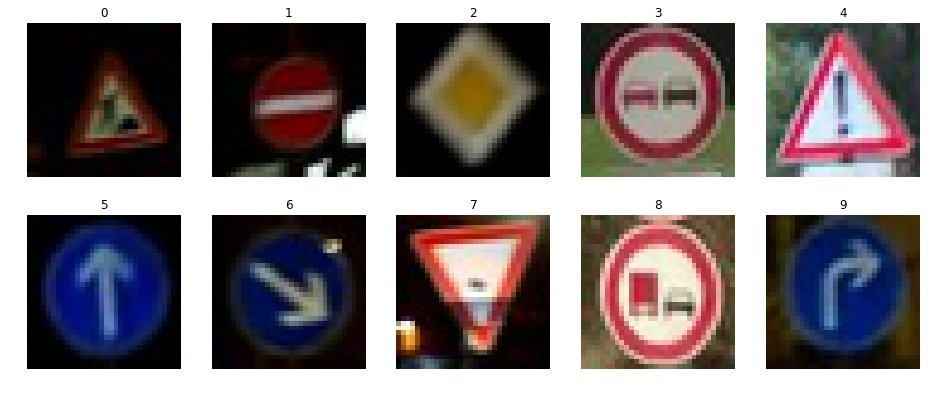

In [49]:
#Plot the raw images
plt.figure(figsize=(16, 10))
for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.imshow(p_img[i]) 
    plt.title(i)
    plt.axis('off')
plt.show()

### Predict the Sign Type for Each Image

In [41]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def predict(X_data, sess):
    pred_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, keep_prob: 1})
    return pred_sign

X_study_pro=np.uint8(np.zeros((16,32,32,3)))
for i in range(16):
    image=p_img[i]
    X_study_pro[i] = process(image)

X_study_pro = X_study_pro.reshape((-1, 32, 32, 3)).astype(np.float32)
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sign_pred=predict(X_study_pro, sess)


Once the net has predicted each signs class, the labels are obtained from the provided signnames.csv and set as title of each image ploted here below

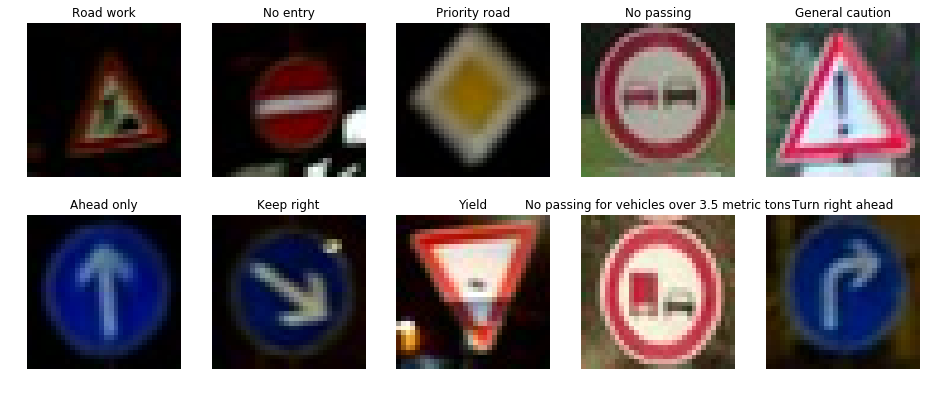

In [48]:

sign_labels = []

with open('signnames.csv', 'rt') as csvfile:
    labels = csv.DictReader(csvfile, delimiter=',')
    for row in labels:
        sign_labels.append((row['SignName']))
        
plt.figure(figsize=(16, 10))
for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.imshow(p_img[i]) 
    plt.title(sign_labels[sign_pred[i]])
    plt.axis('off')
plt.show()

### Analyze Performance

In [43]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
error = 0
for i in range(10):
    if sign_pred[i]!= y_pred[i]:
        print('Error', '// Predicted= ', sign_labels[sign_pred[i]], '// Correct answer= ',sign_labels[y_pred[i]] )
        error+= 1
    acc = (10-error)/10
    
print('Study accuracy =',acc)

Study accuracy = 1.0


### As it can be checked, the net performs as predicted in the test accuracy, obtaining an slight lower acuracy of 0.9375(not accounting the Spanish sign), beeing the only missclassified sign the 80km/h speed limit sign.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [44]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def softmax_5(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, keep_prob: 1.0})    
    soft_5 = tf.nn.top_k(prob, k=5, sorted=True)
    return sess.run(soft_5)


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    soft_prob_5=softmax_5(X_study_pro, sess)

Here below the top five softmax probability values, indices and determined label are shown for each image numbered as in the raw image plotting

In [45]:
for i in range(10):
    print(i,soft_prob_5.values[i, :],soft_prob_5.indices[i, :],'  ',sign_labels[soft_prob_5.indices[i, 0]])

0 [ 1.  0.  0.  0.  0.] [25  0  1  2  3]    Road work
1 [ 1.  0.  0.  0.  0.] [17  0  1  2  3]    No entry
2 [ 1.  0.  0.  0.  0.] [12  0  1  2  3]    Priority road
3 [ 1.  0.  0.  0.  0.] [9 0 1 2 3]    No passing
4 [ 1.  0.  0.  0.  0.] [18  0  1  2  3]    General caution
5 [ 1.  0.  0.  0.  0.] [35  0  1  2  3]    Ahead only
6 [ 1.  0.  0.  0.  0.] [38  0  1  2  3]    Keep right
7 [ 1.  0.  0.  0.  0.] [13  0  1  2  3]    Yield
8 [ 1.  0.  0.  0.  0.] [10  0  1  2  3]    No passing for vehicles over 3.5 metric tons
9 [ 1.  0.  0.  0.  0.] [33  0  1  2  3]    Turn right ahead


As the above shows the implemented Lenet 5 architecture with the dropout layer and preprocessing technics compound a very robust sign classification net obtainining a 100% conffidence in each prediction of the video obtained signs. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

#def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    #featuremaps = activation.shape[3]
    #plt.figure(plt_num, figsize=(15,15))
    #for featuremap in range(featuremaps):
    #    plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
    #    plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
    #    if activation_min != -1 & activation_max != -1:
    #        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
    #    elif activation_max != -1:
    #        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
    #    elif activation_min !=-1:
    #        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
     #   else:
      #      plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")